In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [5]:
column_names = ["sex", "length", "diameter" , "height" , "whole weight" , "shucked weight" , "viscera weight" , "shell weight", "rings"]

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df= pd.read_csv(url, names=column_names)
print("Number of samples: %d" % len(df))
df.head()

Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
print("First Five Rows")
print(df.head())
print("***************************************************************************************")
print("columns",df.columns)
print("******************")
print("Shape:",df.shape)
print("******************")
print("Size:",df.size)
print("******************")
print(df.describe())
print("************************************************")
print(df.nunique())


First Five Rows
  sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
***************************************************************************************
columns Index(['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'rings'],
      dtype='object')
******************
Shape: (4177, 9)
******************
Size: 37593
******************
            

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

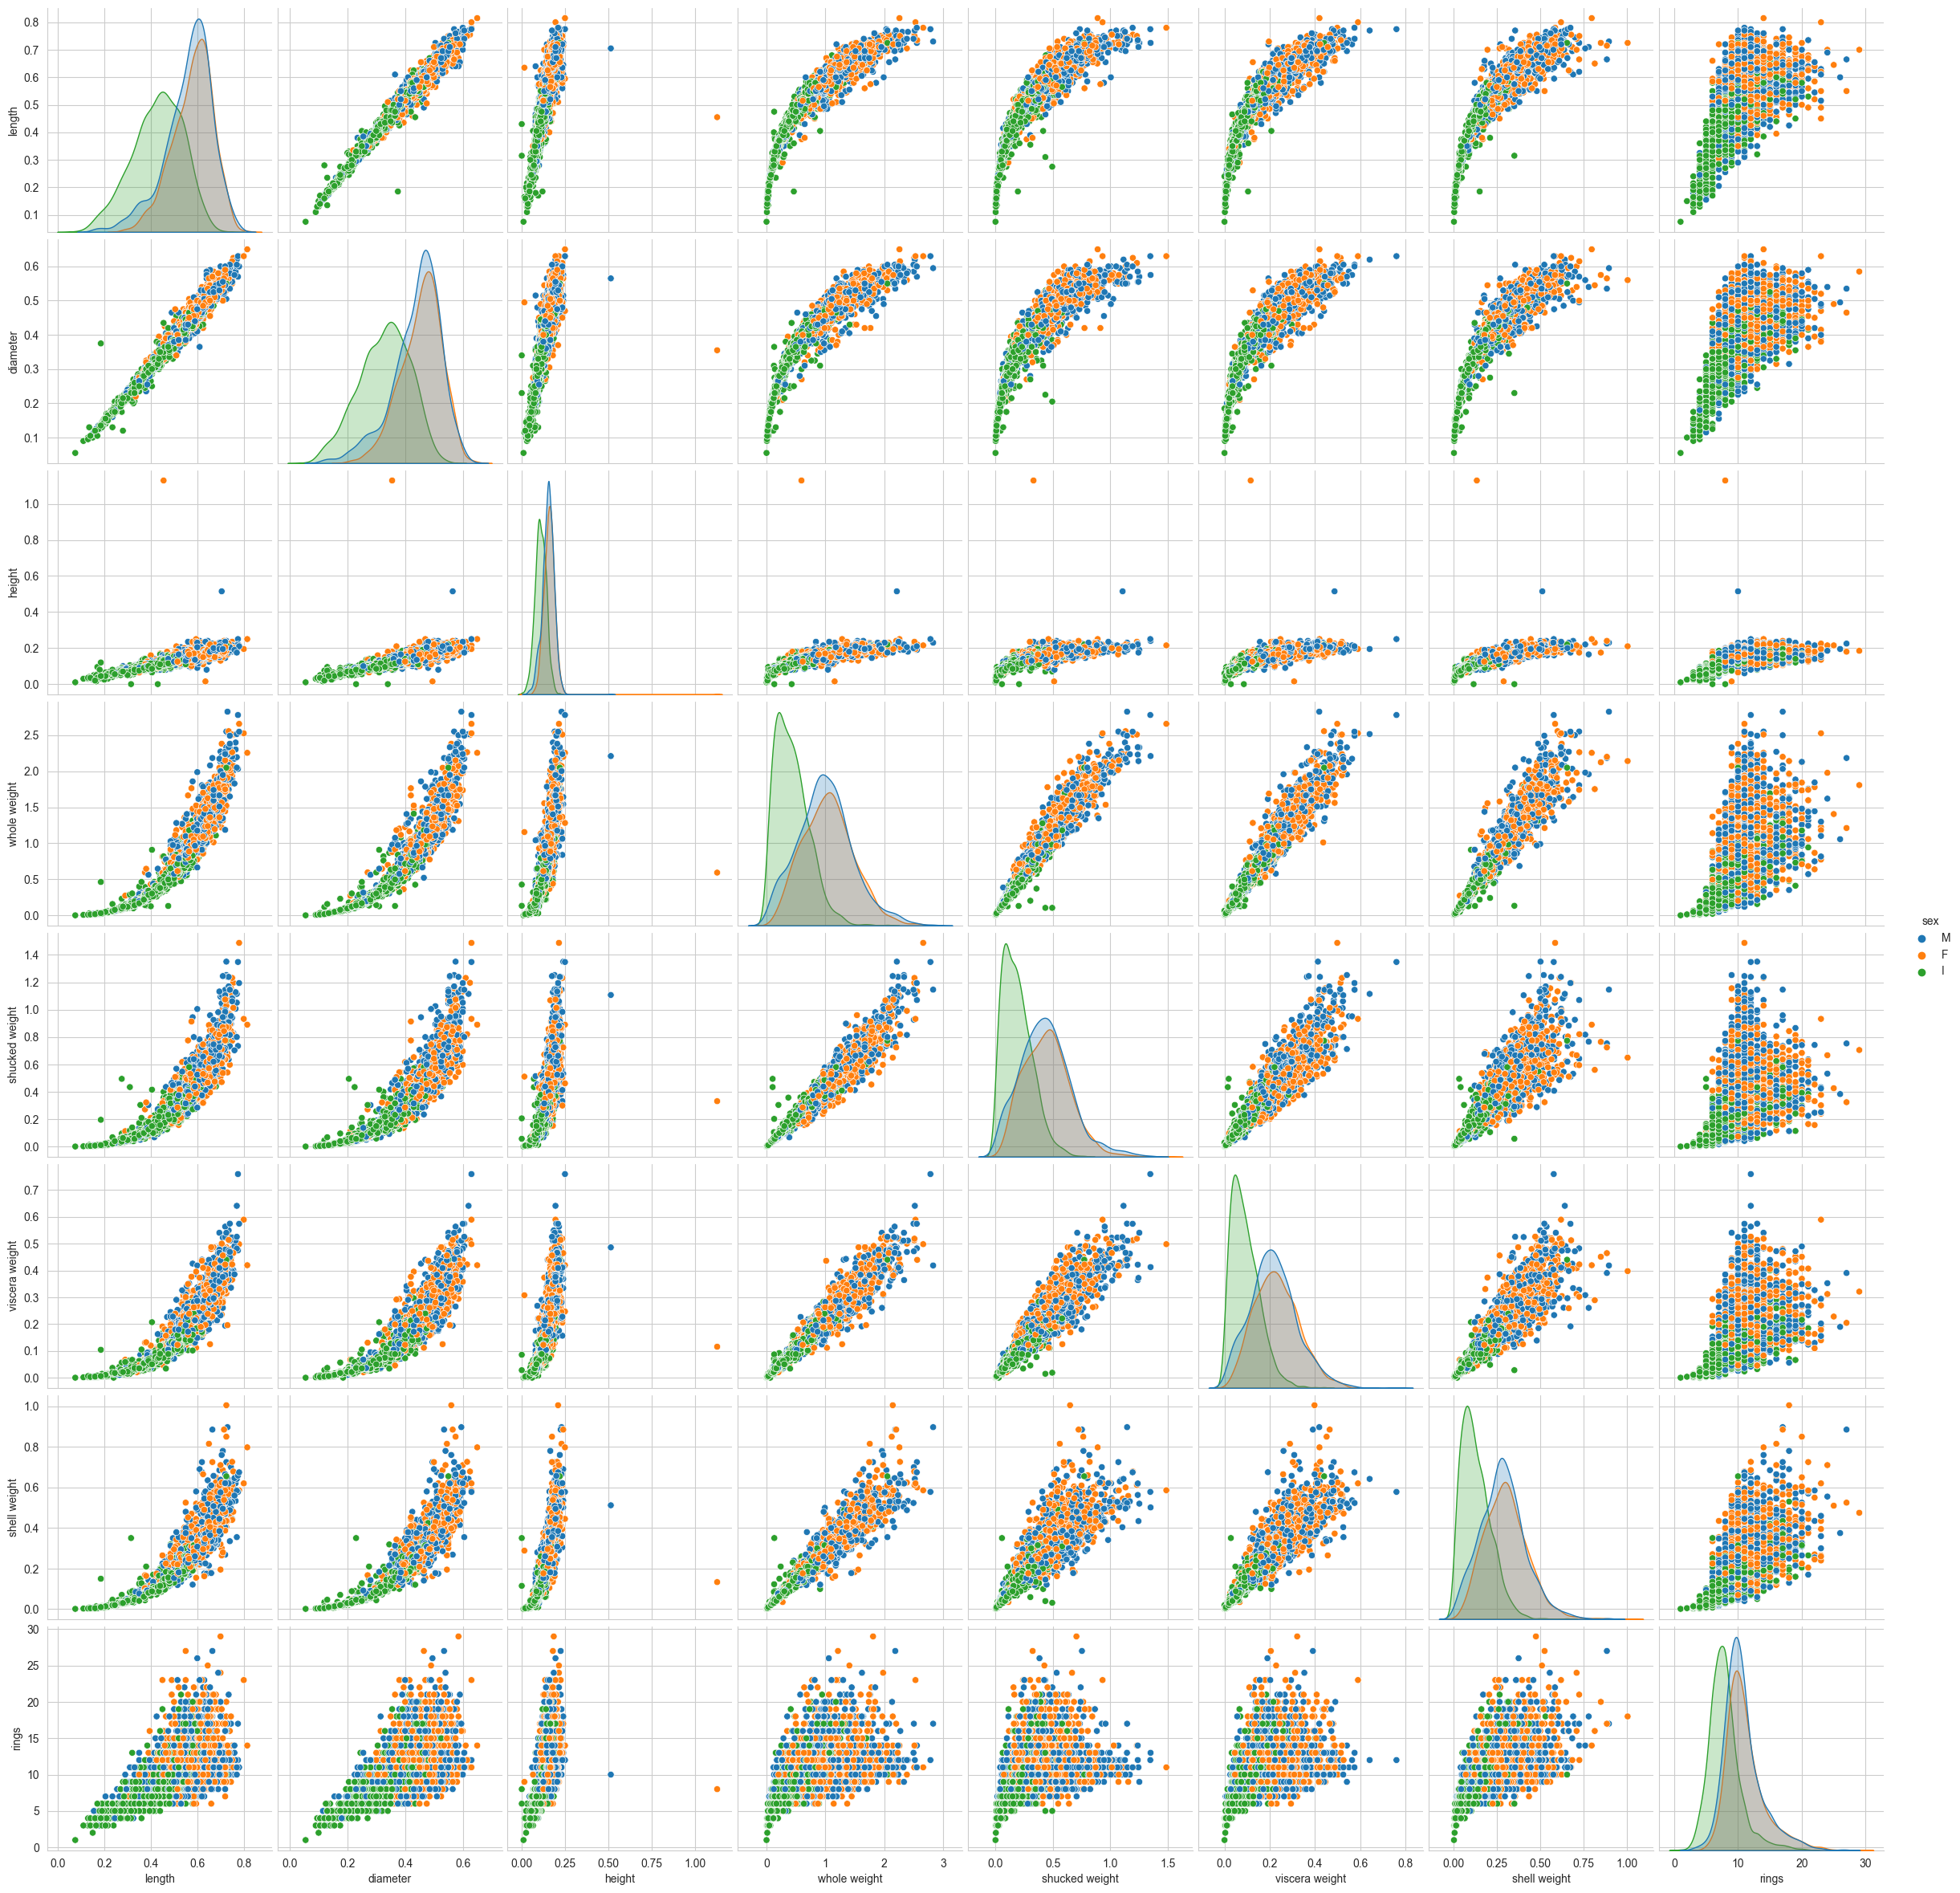

In [23]:
sns.set_style("whitegrid")
sns.pairplot(df,hue= 'sex', size=3);
plt.show

In [24]:
x= df[[ "length", "diameter" , "height" , "whole weight" , "shucked weight" , "viscera weight" , "shell weight", "rings"]]

y=df['sex']

In [26]:
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
print("class Counts")
print(y_test.value_counts(),end="\n\n")
print("class Proportions")
print(y_test.value_counts()/len(y_test))

class Counts
M    458
I    419
F    377
Name: sex, dtype: int64

class Proportions
M    0.365231
I    0.334131
F    0.300638
Name: sex, dtype: float64


In [28]:
logisticRegr = LogisticRegression(solver='liblinear',fit_intercept=True)
logisticRegr.fit(x_train,y_train)
logis_pred = logisticRegr.predict(x_test)
logis_pred_prob = logisticRegr.predict_proba(x_test)

In [30]:
dummy = DummyClassifier(strategy='most_frequent')
dumb = dummy.fit(x_train,y_train)
dumb_pred = dumb.predict(x_test)
dumb_pred_prob = dumb.predict_proba(x_test)

In [31]:
print("Test accuracy (Logistic Regression) =", logisticRegr.score(x_test,y_test),end="\n\n")
print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))


Test accuracy (Logistic Regression) = 0.5685805422647527

Test accuracy (Dummy Classifier) = 0.3652312599681021


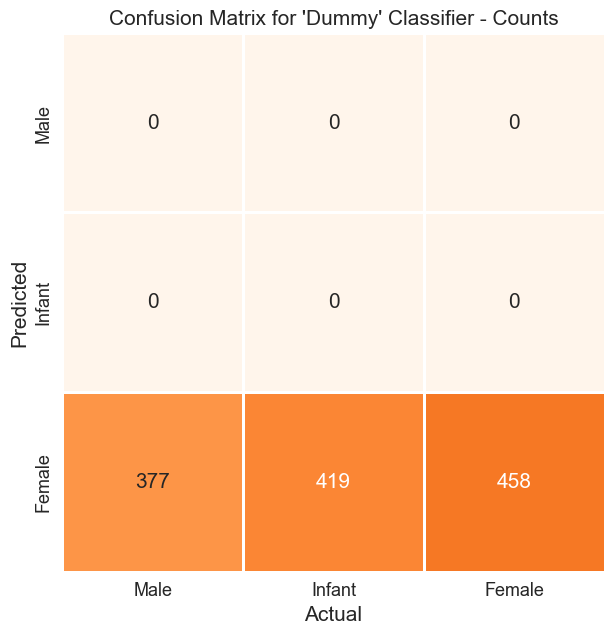

In [34]:
cm_dummy = confusion_matrix(y_test, dumb_pred)
cm_dummy_df = pd.DataFrame(cm_dummy)

fig, ax= plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T,annot=True, annot_kws={"size": 15},cmap='Oranges', vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor='white', cbar=False,
            xticklabels=["Male","Infant","Female"], yticklabels=["Male","Infant","Female"])
plt.ylabel("Predicted",fontsize=15)
plt.xlabel("Actual",fontsize=15)
ax.set_xticklabels(["Male","Infant","Female"], fontsize=13)
ax.set_yticklabels(["Male","Infant","Female"], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts",fontsize=15)

plt.show()

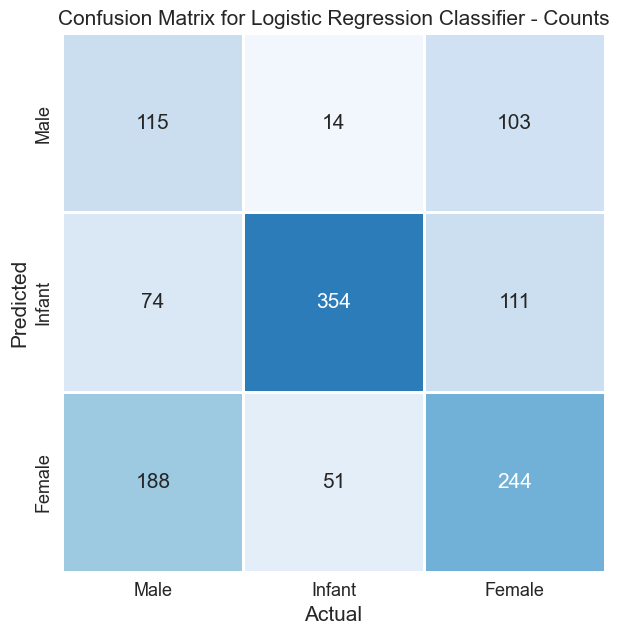

In [37]:
cm_logis = confusion_matrix(y_test, logis_pred)
cm_logis_df= pd.DataFrame(cm_logis)

fig, ax= plt.subplots(figsize = (7,7))

sns.heatmap(cm_logis_df.T,annot=True, annot_kws={"size": 15},cmap='Blues', vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor='white', cbar=False,
            xticklabels=["Male","Infant","Female"], yticklabels=["Male","Infant","Female"])

plt.ylabel("Predicted",fontsize=15)
plt.xlabel("Actual",fontsize=15)


ax.set_xticklabels(["Male","Infant","Female"], fontsize=13)
ax.set_yticklabels(["Male","Infant","Female"], fontsize=13)

plt.title("Confusion Matrix for Logistic Regression Classifier - Counts",fontsize=15)

plt.show()

In [38]:
y_predict = logisticRegr.predict(x_test)
print("Accuracy LR: {:.2f}".format(logisticRegr.score(x_test,y_test)))

Accuracy LR: 0.57


In [39]:
y_predict = pd.DataFrame(y_predict,index= y_test.index, columns=['predict'])

dftest = pd.concat([y_test, y_predict])
df3 = dftest.head(25)
df3.head()

,0,predict
866,M,NaN
1483,M,NaN
599,F,NaN
1702,F,NaN
670,M,NaN


Text(0, 0.5, 'height')

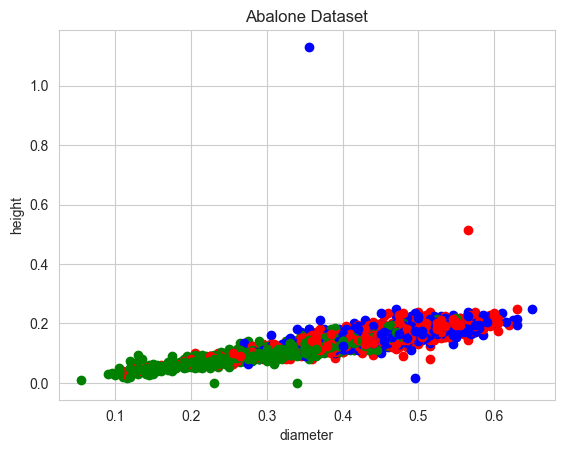

In [43]:
colors = {'M':'r','I':'g','F':'b'}

fig, ax = plt.subplots()

for i in range(len(df['diameter'])):
    ax.scatter(df['diameter'][i], df['height'][i], color=colors[df['sex'][i]])

ax.set_title('Abalone Dataset')
ax.set_xlabel('diameter')
ax.set_ylabel('height')

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(x_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [46]:
NN = x_train
NN['predict'] = kmeans.fit_predict(NN)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


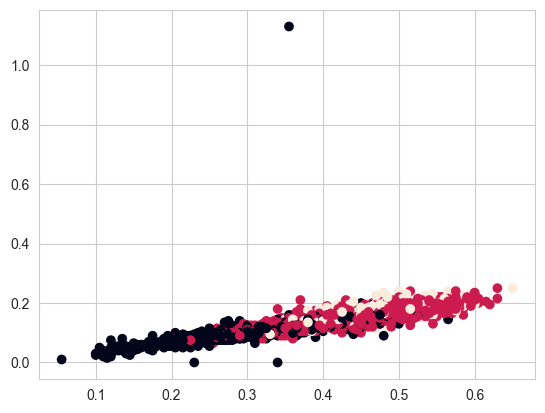

In [47]:
import matplotlib.pyplot as plt
plt.scatter(NN['diameter'], NN['height'], c=NN['predict'])